In [1]:
import bogo as bg
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.special import factorial as fac

mu = 0.99
M = np.array([[1,-mu],[-mu,1]])

na = np.array([0,2])
nb = np.array([0,2])
nA = np.array([1,1])

prod_ab = bg.ab(na,nb,M)
# prod_bA = bg.bA(nb,nA,M)
# prod_aA = bg.aA(na,nA,M)

print(prod_ab)
# print(prod_bA)
# print(prod_aA)




0.4999999999999999


In [3]:
ma = np.array([0,2])
mb = np.array([0,2])
t0 = time.time()
prod_ab = bg.ab(ma,mb,M)
# prod_bA = bg.bA(nb,nA,M)
# prod_aA = bg.aA(na,nA,M)
t1 = time.time()

print(prod_ab)
print("Time = {}".format(t1-t0))

0.4999999999999999
Time = 0.0


Here some known results using v1,v3 for ab:

ab([0,2],[0,2])=0.5

ab([0,0],[0,0])=1

ab([2,1],[0,3])=-0.6123724356957946

ab([2,4],[5,1])=-0.3952847075210471

ab([4,4],[4,4])=0.375

Here some known results using v2,v3 for ab:

ab([0,2],[0,2])=0.5

ab([0,0],[0,0])=1

ab([2,1],[0,3])=-0.6123724356957946

ab([2,4],[5,1])=-0.3952847075210471

ab([4,4],[4,4])=0.375

The time spent for each computed value is on your notes.

Let's add the multipermute package made by Joe and see how it's its performance:

Time ab([0,2],[0,2])=0.0009980201721191406

Time ab([0,0],[0,0]) --> Error: index 0 is out of bounds for axis 0 with size 0

Time ab([2,1],[0,3])=0.001004934310913086

Time ab([2,4],[5,1])=0.0010018348693847656

Time ab([4,4],[4,4])=0.0049974918365478516 <-- From this point this is an improvement with respect to the previous code!

Time ab([6,6],[10,2])=0.004355669021606445

Time ab([20,0],[10,10])=12.460918426513672

By modifying the ab function (including by hand the ground-ground case) the error doesn't appear anymore.

ab([0,0],[0,0])=1.0
Time ab([0,0],[0,0]) = 0.0010008811950683594

In [2]:
na = np.array([0,1,11])
nbs = bg.n_subspace(len(na),np.sum(na))
matrix = np.array([[1,-mu,0],[-mu,1+mu,-mu],[0,-mu,1]])
res = []
for nb in nbs:
#     print(nb)
#     print(bg.ab(na,nb,matrix))
    res.append(bg.ab(na,nb,matrix)**2)

plt.plot(res,'.')
plt.plot(res)
plt.grid()
plt.title('{}'.format(na))
plt.show()



KeyboardInterrupt: 

In [9]:
res = np.array(res)
print(len(res[res<1e-10]))

0


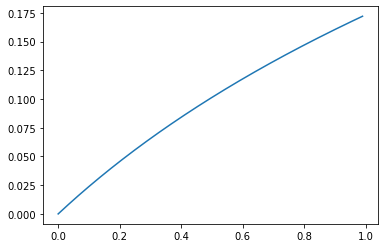

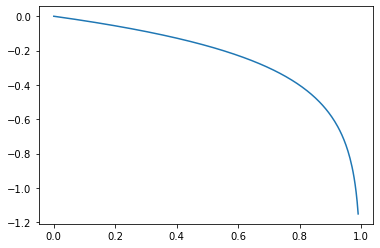

0.17203365968410034
-1.1512925464970223


In [2]:
Mu = np.linspace(0,0.99,300)
omega_p = np.sqrt(Mu+1)
omega_m = np.sqrt(1-Mu)
eta_p = np.arctanh((omega_p-1)/(omega_p+1))
eta_m = np.arctanh((omega_m-1)/(omega_m+1))

plt.plot(Mu,eta_p)
plt.show()
plt.plot(Mu,eta_m)
plt.show()

print(np.max(eta_p))
print(np.min(eta_m))

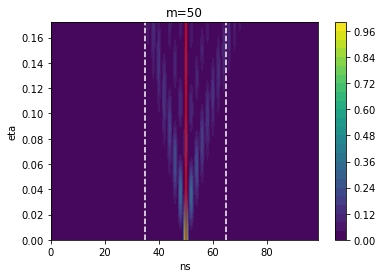

In [11]:
m = 50
ns = np.arange(0,100)

# NS,ETA = np.meshgrid(ns,eta_m)
NS,ETA = np.meshgrid(ns,eta_p)

PROB = (np.vectorize(bg.single)(m,NS,ETA))**2

# plt.contourf(ns,-eta_m,PROB,levels=30)
# plt.ylabel('- eta')

plt.contourf(ns,eta_p,PROB,levels=30)
plt.ylabel('eta')

plt.xlabel('ns')
plt.colorbar()
plt.title('m={}'.format(m))

# plt.vlines(m,np.max(eta_m),-np.min(eta_m),'red')
# plt.vlines(m+20,np.max(eta_m),-np.min(eta_m),'white',linestyle='dashed')
# plt.vlines(m-20,np.max(eta_m),-np.min(eta_m),'white',linestyle='dashed')

plt.vlines(m,np.min(eta_p),np.max(eta_p),'red')
plt.vlines(m+15,np.min(eta_p),np.max(eta_p),'white',linestyle='dashed')
plt.vlines(m-15,np.min(eta_p),np.max(eta_p),'white',linestyle='dashed')

plt.show()

For the squeezing step in the 2 oscillators case in one of the modes the squeezing parameter is negative (there when omega=sqrt(1-mu)). In that case the number distribution for the possible values of eta is not concentrated near to the  original value, as it happens for the case where omega=sqrt(1+mu). The plots obtained in the cell above show this behaviour.

When eta_p is selected the plot shows how the distribution is centered around the red line and bounded by the dashed lines for general values of m. When eta_m is selected the distribution splits in two lines that go far from the center, making that most of the number distribution lays out of the boundaries. 